**Road Map**

**1** - entender o problema e ler o artigo de referência;

**2** - entender o significado de cada coluna e valor; 

**3** - fazer a análise descritiva dos dados;

**4** - desenvolver os algoritmos (random forest, SVM, logistic regression, NN);

**5** - condensar os resultados em gráficos;

**6** - condensar os pontos principais num word;

**7** - gravar o vídeo.


# **Importanto as bibliotecas e fazendo upload do csv**

In [ ]:
#importando as bibliotecas

#básicas
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import keras 
import itertools 
import sklearn 
import tensorflow as tf
%matplotlib inline

#modelos
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

#Random Forest
from sklearn.ensemble import RandomForestClassifier

#SVM
from sklearn import svm
from sklearn.svm import SVC

#logistic regression
from sklearn.linear_model import LogisticRegression

#Neural Network
from keras import models, layers, optimizers
from keras.utils import plot_model
from keras.layers import Dense, Dropout
from sklearn.neural_network import MLPClassifier

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
#lendo o arquivo
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv("/content/drive/My Drive/Processo seletivo AIbox/Website Phishing.csv")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


# **Analisando os dados**

In [ ]:
data.head()


,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1


In [ ]:
data.shape


(1353, 10)

In [ ]:
#Checando se há dados faltantes
data.info()
#não há dados faltantes, oque reduz nosso trabalho para tratar os dados

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   SFH                1353 non-null   int64
 1   popUpWidnow        1353 non-null   int64
 2   SSLfinal_State     1353 non-null   int64
 3   Request_URL        1353 non-null   int64
 4   URL_of_Anchor      1353 non-null   int64
 5   web_traffic        1353 non-null   int64
 6   URL_Length         1353 non-null   int64
 7   age_of_domain      1353 non-null   int64
 8   having_IP_Address  1353 non-null   int64
 9   Result             1353 non-null   int64
dtypes: int64(10)
memory usage: 105.8 KB


In [ ]:
#visualizar a quantidade de cada classe em cada feature
colunas = data.columns
dict1 = {}
for i in colunas:
  dict1.update({i : data[i].value_counts().values})
dict1.update({'having_IP_Address': [1198, 0,  155]}) #é necessário fazer essa alteração manual para poder converter em dataframe
dict1.update({'age_of_domain': [825, 0, 528]}),
df = pd.DataFrame(dict1, index=["Malicioso", "Suspeito", "légitimo"])
df


,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
Malicioso,767,639,751,617,610,473,563,825,1198,702
Suspeito,445,532,308,421,576,440,431,0,0,548
légitimo,141,182,294,315,167,440,359,528,155,103


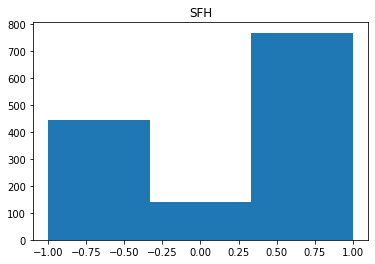

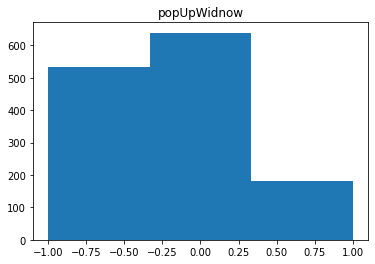

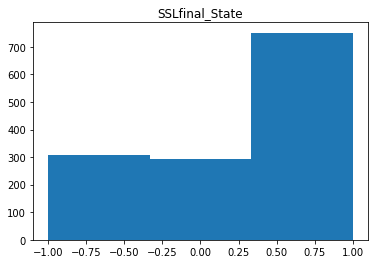

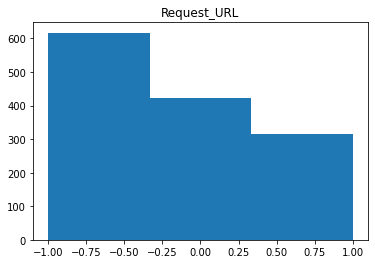

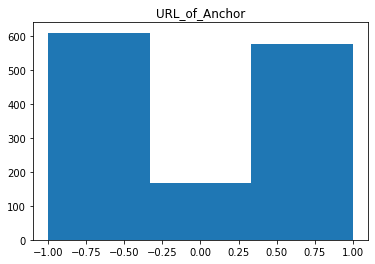

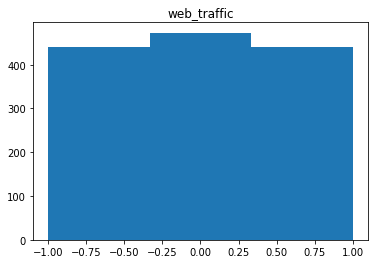

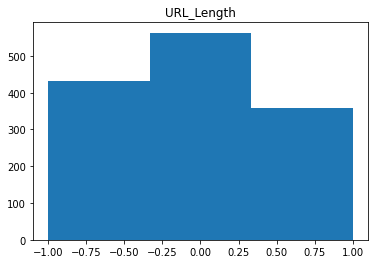

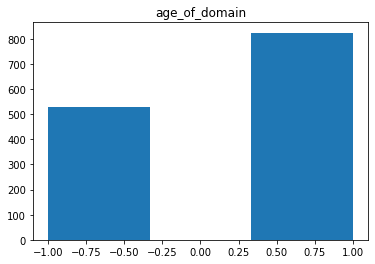

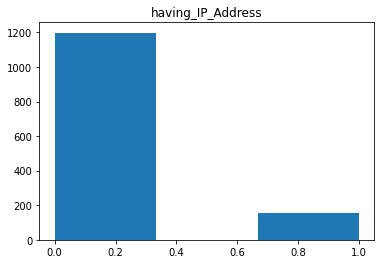

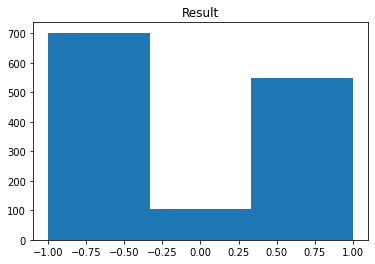

In [ ]:
for i in colunas:
  plt.hist(x = data[i], bins = 3)
  plt.title(i)
  plt.show( )

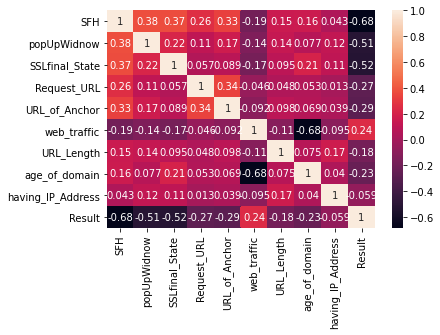

In [ ]:
sns.heatmap(data.corr(),annot=True)
#Como se tem apenas 3 valores em cada feature, é possível inferir que uma corr negativa indica que 1 leva a -1

In [ ]:
size = data.groupby(['SFH'])['Result'].value_counts()
size
#é possível ver isso analisando esses números, onde temos SFH com valor = 1 e Result -1 e vice-versa liderando as 2 contagens mais altas

SFH  Result
-1    1        340
     -1         59
      0         46
 0    1        125
      0         14
     -1          2
 1   -1        641
      1         83
      0         43
Name: Result, dtype: int64

# **Preparando os dados**

In [ ]:
X = data[['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'web_traffic', 'URL_Length', 'age_of_domain', 'having_IP_Address']] 
y = data['Result'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% treinamento and 30% teste

# **Random Forest**

In [ ]:
classificador = RandomForestClassifier(bootstrap=False, 
                                       class_weight=None, 
                                       criterion='gini',
                                       max_depth= 80, 
                                       max_features= 3,  
                                       min_samples_leaf=5, 
                                       min_samples_split=12,
                                       n_estimators=100, 
                                       random_state=42)

In [ ]:
classificador.fit(X_train,y_train)
y_pred = classificador.predict(X_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average='macro'))

Acurácia: 0.8768472906403941
Precision: 0.8562047774804243
Recall: 0.7622640833538034
F1-score: 0.7915546464056108


In [ ]:
feature_selection = pd.Series(classificador.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_selection
#como pode se ver as features age_ofdomain e having_ip_adress tem pouca importância para o modelo, porém ao retirar elas do modelo, não houve melhora

SFH                  0.410258
SSLfinal_State       0.206039
popUpWidnow          0.138372
Request_URL          0.073800
URL_of_Anchor        0.071846
URL_Length           0.044860
web_traffic          0.034689
age_of_domain        0.016743
having_IP_Address    0.003393
dtype: float64

In [ ]:
print(confusion_matrix(y_test, y_pred))

[[217   1  18]
 [  7  15  10]
 [ 12   2 124]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.92      0.92      0.92       236
           0       0.83      0.47      0.60        32
           1       0.82      0.90      0.86       138

    accuracy                           0.88       406
   macro avg       0.86      0.76      0.79       406
weighted avg       0.88      0.88      0.87       406



Retirando as duas features age_of_domain e having_ip_adress 

In [ ]:
X = data[['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'web_traffic', 'URL_Length']]
y = data['Result']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% treinamento and 30% teste

classificador = RandomForestClassifier(bootstrap=False, 
                                       class_weight=None, 
                                       criterion='gini',
                                       max_depth= 80, 
                                       max_features= 3,  
                                       min_samples_leaf=5, 
                                       min_samples_split=12,
                                       n_estimators=100, 
                                       random_state=42)

classificador.fit(X_train,y_train)
y_pred = classificador.predict(X_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average='macro'))

Acurácia: 0.8916256157635468
Precision: 0.8591936575029213
Recall: 0.8771886973180076
F1-score: 0.8674972456321223


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[184   5  11]
 [  0  27   5]
 [ 20   3 151]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.92      0.93      0.93       214
           0       0.87      0.72      0.79        36
           1       0.89      0.90      0.90       156

    accuracy                           0.90       406
   macro avg       0.89      0.85      0.87       406
weighted avg       0.90      0.90      0.90       406



houve uma pequena melhora ( em torno de 3%) 

**Uso de Grid Search**

In [ ]:
X = data[['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'web_traffic', 'URL_Length']]
y = data['Result']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% treinamento and 30% teste

In [ ]:
random_grid = {'n_estimators': [100, 150, 200, 250, 300, 400],
               'max_features': [2, 'auto', 'sqrt'],
               'max_depth': [10, 20, 30, 40, 50],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf':[1, 2, 4],
               'bootstrap': [True, False]}

In [ ]:
classifier = RandomForestClassifier()
classifier_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 300, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
classifier_random.fit(X_train,y_train)

Fitting 3 folds for each of 300 candidates, totalling 900 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   43.8s
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 900 out of 900 | elapsed:  4.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [ ]:
classifier_random.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'max_features': 2,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

In [ ]:
y_pred = classificador_random.predict(X_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average='macro'))

Utilizando todos as features

In [ ]:
random_grid = {'n_estimators': [100, 150, 200, 250, 300, 400],
               'max_features': [2, 'auto', 'sqrt'],
               'max_depth': [10, 20, 30, 40, 50],
               'min_samples_split': [2, 5, 10],
               'min_samples_leaf':[1, 2, 4],
               'bootstrap': [True, False]}

classifier = RandomForestClassifier()
classifier_random = RandomizedSearchCV(estimator = classifier, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
classifier_random.fit(X_train,y_train)

classifier_random.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   11.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   44.8s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.4min finished


{'bootstrap': True,
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
y_pred = classifier_random.predict(X_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average='macro'))

Acurácia: 0.9014778325123153
Precision: 0.8832471051983247
Recall: 0.8885029669492731
F1-score: 0.8857596431181655


# **SVM**

In [ ]:
X = data[['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'web_traffic', 'URL_Length']] 
y = data['Result']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% treinamento and 30% teste


In [ ]:
svm_classifier = svm.SVC(kernel='linear', random_state=42) #utilizando o mesmo padrão aleatório que o random forest
svm_classifier.fit(X_train, y_train)
y_pred = svm_classifier.predict(X_test)

In [ ]:
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average='macro'))

Acurácia: 0.8226600985221675
Precision: 0.5452180116664569
Recall: 0.600406903038482
F1-score: 0.5708174115301544


In [ ]:
print(confusion_matrix(y_test, y_pred))

[[193   0  15]
 [ 13   2  12]
 [ 16   1 154]]


**Uso de Grid Search**

In [ ]:
svm = SVC(random_state = 42)
svm_parameter_space ={'C':[1,10,100,1000],'gamma':[1, 0.142, 0.1, 0.001, 0.0001], 'kernel':['rbf','linear', 'poly', 'sigmoid']}
classificador_svm =GridSearchCV(svm,svm_parameter_space,n_jobs=-1)
classificador_svm.fit(X_train, y_train)
print('Melhor parâmetro encontrado:\n', classificador_svm.best_params_)


Melhor parâmetro encontrado:
 {'C': 10, 'gamma': 0.142, 'kernel': 'rbf'}


In [ ]:
y_pred = classificador_svm.predict(X_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average='macro'))


Acurácia: 0.896551724137931
Precision: 0.8733265611969124
Recall: 0.8602905193301584
F1-score: 0.8665623369848722


# **Logistic Regression**

Utilizando 9 features

In [ ]:
classificador_LR = LogisticRegression( C= 10, random_state= 42, multi_class = 'multinomial') 
classificador_LR.fit(X_train,y_train)
y_pred=classificador_LR.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average='macro'))


Accuracy: 0.8448275862068966
Precision: 0.734331232492997
Recall: 0.6628329353841598
F1-score: 0.6780196408116237


utilizando o grid search com 9 features

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2'],
    'C' : [0.1, 1, 10, 20, 50],
    'solver' : ['sag', 'saga', 'newton-cg', 'lbfgs'],
    'multi_class' : ['multinomial']}
]


In [ ]:
classifier = LogisticRegression(random_state=42)
classifier_CV = GridSearchCV(estimator = classifier, param_grid= param_grid, cv = 3, n_jobs = -1)
# Fit the random search model
classifier_CV.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=42, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [0.1, 1, 10, 20, 50],
                          'multi_class': ['multinomial'],
                          'penalty': ['l1', 'l2'],
                          'solver': ['sag', 'saga', 'newton-cg', 'lbfgs']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
classifier_CV.best_params_

{'C': 0.1, 'multi_class': 'multinomial', 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
y_pred = classifier_CV.predict(X_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average='macro'))

Acurácia: 0.8349753694581281
Precision: 0.5580451127819549
Recall: 0.5974810213940649
F1-score: 0.577059202059202


7 features

In [ ]:
X = data[['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'web_traffic', 'URL_Length']]
y = data['Result']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% treinamento and 30% teste

In [ ]:
classificador_LR = LogisticRegression( C= 10, random_state= 42, multi_class = 'multinomial') 
classificador_LR.fit(X_train,y_train)
y_pred=classificador_LR.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.8448275862068966
Precision: 0.734331232492997
Recall: 0.6628329353841598
F1-score: 0.6780196408116237


7 features grid search


In [ ]:
classifier = LogisticRegression(random_state=42)
classifier_CV = GridSearchCV(estimator = classifier, param_grid= param_grid, cv = 3, n_jobs = -1)
# Fit the random search model
classifier_CV.fit(X_train,y_train)

classifier_CV.best_params_

{'C': 0.1, 'multi_class': 'multinomial', 'penalty': 'l2', 'solver': 'sag'}

In [ ]:
y_pred = classifier_CV.predict(X_test)
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred, average='macro'))
print("Recall:",metrics.recall_score(y_test, y_pred, average='macro'))
print("F1-score:",metrics.f1_score(y_test, y_pred, average='macro'))

Acurácia: 0.8078817733990148
Precision: 0.6057058575642648
Recall: 0.5997655678863733
F1-score: 0.5789577747724235


# **Neural Network**

Utilizando 9 features

In [ ]:
batch_size = 100 #tamanho dos pacotes de envio de dados, ideal é transformar isso aqui num multiplo de rows 
epochs = 50 #número de vezes que o modelo será treinado
verbose = 1

In [ ]:
Classificador_NN = keras.models.Sequential()
Classificador_NN.add(Dense(12, activation='relu', input_shape=(X_train.shape[1],)))
Classificador_NN.add(Dense(140, activation = 'relu'))
Classificador_NN.add(Dropout(0.2)) 
Classificador_NN.add(Dense(70, activation = 'relu'))
Classificador_NN.add(Dropout(0.2))
Classificador_NN.add(Dense(35, activation = 'relu'))
Classificador_NN.add(Dense(1, activation='sigmoid'))

Classificador_NN.summary()

keras.utils.plot_model(Classificador_NN, to_file='model.png', show_shapes=True, show_layer_names=True)

#compilando o modelo
Classificador_NN.compile(loss= 'mean_absolute_error',
              optimizer='rmsprop',  #rmsprop
              metrics=["accuracy", "Recall", "Precision"]) #f1-score não faz parte das métricas do keras

#realiza o treinamento e salva os resultdos
Classificador = Classificador_NN.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

resultado = Classificador_NN.evaluate(X_test, y_test, verbose=0)

#Imprime resultado
print('Test accuracy:', resultado[1])
print('Test Recall:', resultado[2])
print('Test Precision:', resultado[3])

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 12)                120       
_________________________________________________________________
dense_21 (Dense)             (None, 140)               1820      
_________________________________________________________________
dropout_8 (Dropout)          (None, 140)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 70)                9870      
_________________________________________________________________
dropout_9 (Dropout)          (None, 70)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 35)                2485      
_________________________________________________________________
dense_24 (Dense)             (None, 1)                

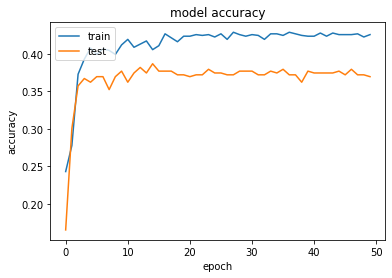

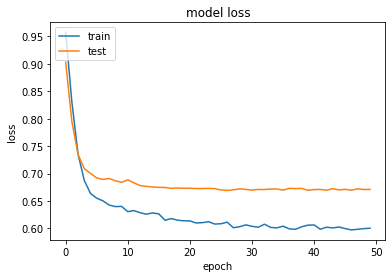

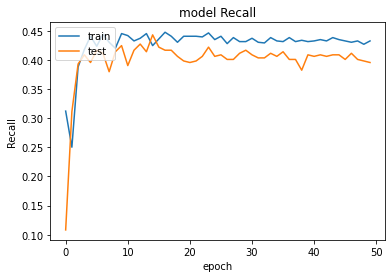

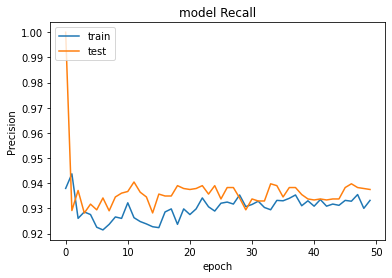

In [ ]:
# Plota gráfico de acurácia - Com isso podemos visualmente entender se a generalização está ocorrendo de forma boa
plt.plot(Classificador.history['accuracy'])
plt.plot(Classificador.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plota gráfico de Loss
plt.plot(Classificador.history['loss'])
plt.plot(Classificador.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(Classificador.history['recall'])
plt.plot(Classificador.history['val_recall'])
plt.title('model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(Classificador.history['precision'])
plt.plot(Classificador.history['val_precision'])
plt.title('model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


Grid Search com 9 features

In [ ]:
mlp = MLPClassifier(max_iter=5000)
mlp_parameter_space = {'hidden_layer_sizes': [(70),(140),(140,70),(140,70,35),(140,70,35,20)]}

gridRN = GridSearchCV(mlp, mlp_parameter_space, cv=10)
gridRN.fit(X_train, y_train) 
print('Melhor parametro encontrado:', gridRN.best_params_)

Melhor parametro encontrado: {'hidden_layer_sizes': (140, 70)}


In [ ]:
Classificador_NN = keras.models.Sequential()
Classificador_NN.add(Dense(12, activation='relu', input_shape=(X_train.shape[1],)))
Classificador_NN.add(Dense(140, activation = 'relu'))
Classificador_NN.add(Dropout(0.2)) 
Classificador_NN.add(Dense(70, activation = 'relu'))
Classificador_NN.add(Dense(1, activation='sigmoid'))

Classificador_NN.summary()

keras.utils.plot_model(Classificador_NN, to_file='model.png', show_shapes=True, show_layer_names=True)

#compilando o modelo
Classificador_NN.compile(loss='mean_absolute_error',
              optimizer='rmsprop',  #rmsprop
              metrics=["accuracy", "Recall", "Precision"]) #f1-score não faz parte das métricas do keras

#realiza o treinamento e salva os resultdos
Classificador = Classificador_NN.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

resultado = Classificador_NN.evaluate(X_test, y_test, verbose=0)

#Imprime resultado
print('Test accuracy:', resultado[1])
print('Test Recall:', resultado[2])
print('Test Precision:', resultado[3])

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_33 (Dense)             (None, 12)                120       
_________________________________________________________________
dense_34 (Dense)             (None, 140)               1820      
_________________________________________________________________
dropout_12 (Dropout)         (None, 140)               0         
_________________________________________________________________
dense_35 (Dense)             (None, 70)                9870      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 71        
Total params: 11,881
Trainable params: 11,881
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 0s 33ms/step - loss: 0.9553 - accuracy: 0.2830 - recall: 0.3490 

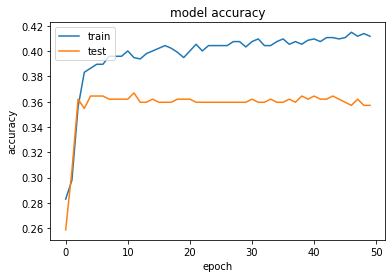

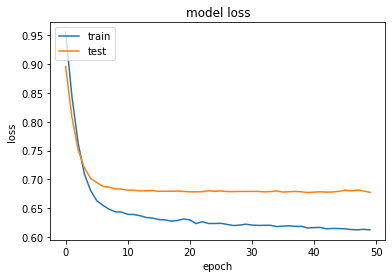

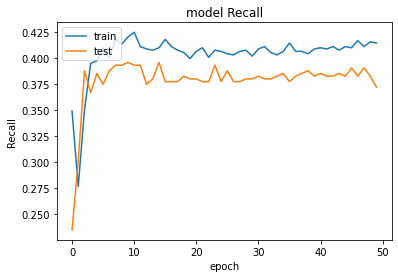

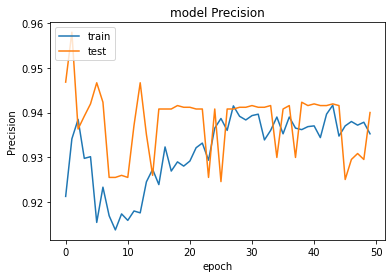

In [ ]:
# Plota gráfico de acurácia - Com isso podemos visualmente entender se a generalização está ocorrendo de forma boa
plt.plot(Classificador.history['accuracy'])
plt.plot(Classificador.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plota gráfico de Loss
plt.plot(Classificador.history['loss'])
plt.plot(Classificador.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(Classificador.history['recall'])
plt.plot(Classificador.history['val_recall'])
plt.title('model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(Classificador.history['precision'])
plt.plot(Classificador.history['val_precision'])
plt.title('model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

*Utilizando* 7 features

In [ ]:
X = data[['SFH', 'popUpWidnow', 'SSLfinal_State', 'Request_URL', 'URL_of_Anchor', 'web_traffic', 'URL_Length']] 
y = data['Result']  # Labels

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% treinamento and 30% teste


In [ ]:
Classificador_NN = keras.models.Sequential()
Classificador_NN.add(Dense(12, activation='relu', input_shape=(X_train.shape[1],)))
Classificador_NN.add(Dense(140, activation = 'relu'))
Classificador_NN.add(Dropout(0.2)) 
Classificador_NN.add(Dense(70, activation = 'relu'))
Classificador_NN.add(Dropout(0.2))
Classificador_NN.add(Dense(35, activation = 'relu'))
Classificador_NN.add(Dense(1, activation='sigmoid'))

Classificador_NN.summary()

keras.utils.plot_model(Classificador_NN, to_file='model.png', show_shapes=True, show_layer_names=True)

#compilando o modelo
Classificador_NN.compile(loss= 'mean_absolute_error',
              optimizer='rmsprop',  #rmsprop
              metrics=["accuracy", "Recall", "Precision"]) #f1-score não faz parte das métricas do keras

#realiza o treinamento e salva os resultdos
Classificador = Classificador_NN.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

resultado = Classificador_NN.evaluate(X_test, y_test, verbose=0)

#Imprime resultado
print('Test accuracy:', resultado[1])
print('Test Recall:', resultado[2])
print('Test Precision:', resultado[3])

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 12)                96        
_________________________________________________________________
dense_38 (Dense)             (None, 140)               1820      
_________________________________________________________________
dropout_13 (Dropout)         (None, 140)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 70)                9870      
_________________________________________________________________
dropout_14 (Dropout)         (None, 70)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 35)                2485      
_________________________________________________________________
dense_41 (Dense)             (None, 1)                

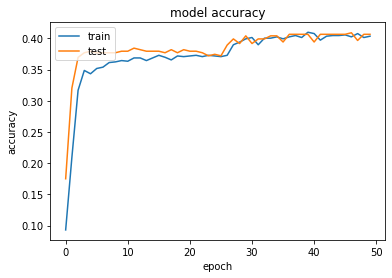

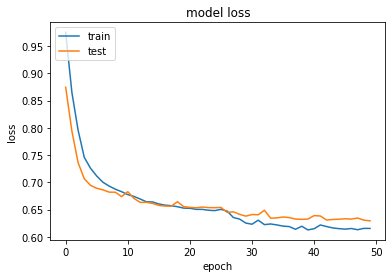

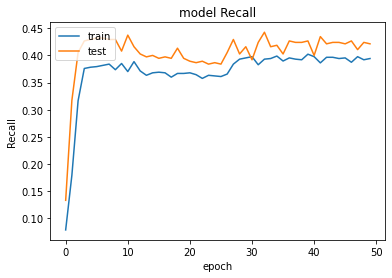

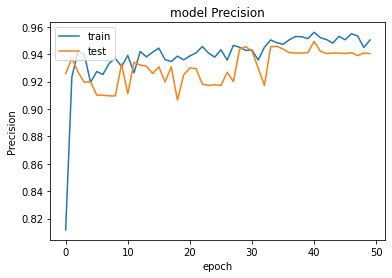

In [ ]:
# Plota gráfico de acurácia - Com isso podemos visualmente entender se a generalização está ocorrendo de forma boa
plt.plot(Classificador.history['accuracy'])
plt.plot(Classificador.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plota gráfico de Loss
plt.plot(Classificador.history['loss'])
plt.plot(Classificador.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(Classificador.history['recall'])
plt.plot(Classificador.history['val_recall'])
plt.title('model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(Classificador.history['precision'])
plt.plot(Classificador.history['val_precision'])
plt.title('model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Utilizando 7 features com o grid Search

In [ ]:
mlp = MLPClassifier(max_iter=5000)
mlp_parameter_space = {'hidden_layer_sizes': [(70),(140),(140,70),(140,70,35),(140,70,35,20)]}

gridRN = GridSearchCV(mlp, mlp_parameter_space, cv=10)
gridRN.fit(X_train, y_train) 
print('Melhor parametro encontrado:', gridRN.best_params_)

Melhor parametro encontrado: {'hidden_layer_sizes': 140}


In [ ]:
Classificador_NN = keras.models.Sequential()
Classificador_NN.add(Dense(12, activation='relu', input_shape=(X_train.shape[1],)))
Classificador_NN.add(Dense(140, activation = 'relu'))
Classificador_NN.add(Dense(1, activation='sigmoid'))

Classificador_NN.summary()

keras.utils.plot_model(Classificador_NN, to_file='model.png', show_shapes=True, show_layer_names=True)

#compilando o modelo
Classificador_NN.compile(loss= 'mean_absolute_error',
              optimizer='rmsprop',  #rmsprop
              metrics=["accuracy", "Recall", "Precision"]) #f1-score não faz parte das métricas do keras

#realiza o treinamento e salva os resultdos
Classificador = Classificador_NN.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(X_test, y_test))

resultado = Classificador_NN.evaluate(X_test, y_test, verbose=0)

#Imprime resultado
print('Test accuracy:', resultado[1])
print('Test Recall:', resultado[2])
print('Test Precision:', resultado[3])

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 12)                96        
_________________________________________________________________
dense_43 (Dense)             (None, 140)               1820      
_________________________________________________________________
dense_44 (Dense)             (None, 1)                 141       
Total params: 2,057
Trainable params: 2,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
10/10 [==============================] - 0s 34ms/step - loss: 1.0027 - accuracy: 0.3210 - recall: 0.4983 - precision: 0.9397 - val_loss: 0.9394 - val_accuracy: 0.3473 - val_recall: 0.3893 - val_precision: 0.9182
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.9351 - accuracy: 0.3337 - recall: 0.3451 - precision: 0.9264 - val_loss: 0.8891 - val

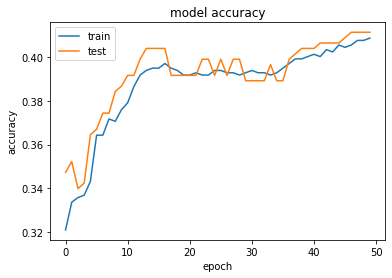

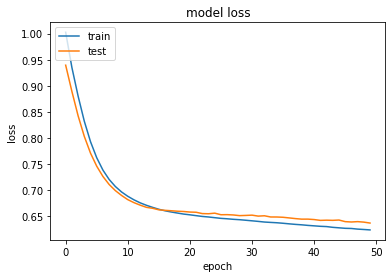

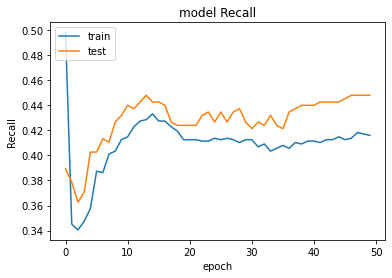

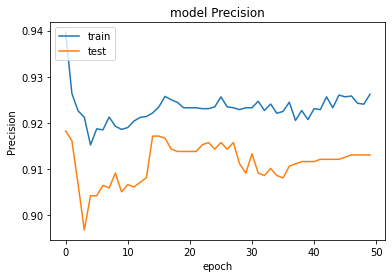

In [ ]:
# Plota gráfico de acurácia - Com isso podemos visualmente entender se a generalização está ocorrendo de forma boa
plt.plot(Classificador.history['accuracy'])
plt.plot(Classificador.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Plota gráfico de Loss
plt.plot(Classificador.history['loss'])
plt.plot(Classificador.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(Classificador.history['recall'])
plt.plot(Classificador.history['val_recall'])
plt.title('model Recall')
plt.ylabel('Recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(Classificador.history['precision'])
plt.plot(Classificador.history['val_precision'])
plt.title('model Precision')
plt.ylabel('Precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# **Resultados**

In [ ]:
#random, svm, logistic
resultado_dict_accuracy = {'9 features':[0.8768, 0.8596, 0.8448], '9 feat + grid S': [0.9113, 0.8965, 0.8349], '7 features': [0.9064, 0.8226, 0.8448 ],  '7 feat + grid S': [0.9408, 0.8793, 0.8078]}
resultado_dict_precision = {'9 features':[0.8586, 0.7956, 0.7343], '9 feat + grid S':[0.8725, 0.8733, 0.5580], '7 features':[0.8427, 0.5421, 0.7343 ],  '7 feat + grid S': [0.9334, 0.8175, 0.6057]}
resultado_dict_recall = {'9 features':[0.7493, 0.6341, 0.6628], '9 feat + grid S':[0.9001, 0.8602, 0.5974], '7 features':[0.8381, 0.6004, 0.6628 ],  '7 feat + grid S': [0.9207, 0.8164, 0.5997]}
resultado_dict_f1score = {'9 features':[0.7824, 0.6353, 0.6780], '9 feat + grid S':[0.8852, 0.8665, 0.5770], '7 features':[0.8401,  0.5708, 0.6780],  '7 feat + grid S': [0.9260, 0.8169, 0.5789]}

In [ ]:
resultado_accuracy = pd.DataFrame(resultado_dict_accuracy, index=["Random Forest", "SVM", "logistic Regression"])
resultado_accuracy.index.name = 'Accuracy'
resultado_precision = pd.DataFrame(resultado_dict_precision, index=["Random Forest", "SVM", "logistic Regression"])
resultado_precision.index.name = 'Precision'
resultado_recall = pd.DataFrame(resultado_dict_recall, index=["Random Forest", "SVM", "logistic Regression"])
resultado_recall.index.name = 'Recall'
resultado_f1score = pd.DataFrame(resultado_dict_f1score, index=["Random Forest", "SVM", "logistic Regression"])
resultado_f1score.index.name = 'f1-score'

In [ ]:
lista2 = [resultado_accuracy, resultado_precision, resultado_recall, resultado_f1score]
for i in lista2:
  print(i)

                     9 features  9 feat + grid S  7 features  7 feat + grid S
Accuracy                                                                     
Random Forest            0.8768           0.9113      0.9064           0.9408
SVM                      0.8596           0.8965      0.8226           0.8793
logistic Regression      0.8448           0.8349      0.8448           0.8078
                     9 features  9 feat + grid S  7 features  7 feat + grid S
Precision                                                                    
Random Forest            0.8586           0.8725      0.8427           0.9334
SVM                      0.7956           0.8733      0.5421           0.8175
logistic Regression      0.7343           0.5580      0.7343           0.6057
                     9 features  9 feat + grid S  7 features  7 feat + grid S
Recall                                                                       
Random Forest            0.7493           0.9001      0.8381    

Text(0.5, 1.0, 'accuracy')

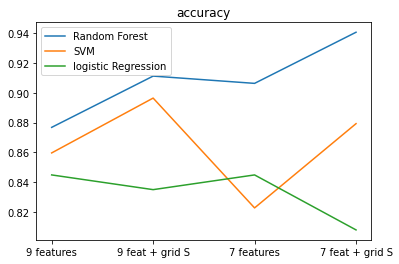

In [ ]:
#acurracy
plt.plot(resultado_accuracy.columns ,resultado_accuracy.loc['Random Forest'])
plt.plot(resultado_accuracy.columns ,resultado_accuracy.loc['SVM'])
plt.plot(resultado_accuracy.columns ,resultado_accuracy.loc['logistic Regression'])
plt.legend(['Random Forest', 'SVM', 'logistic Regression'], loc='upper left')
plt.title('accuracy')

Text(0.5, 1.0, 'precision')

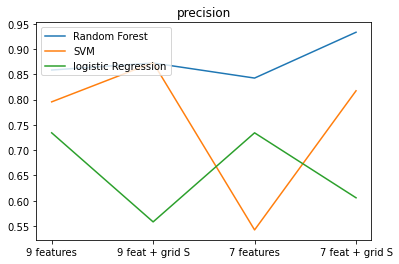

In [ ]:
#precison
plt.plot(resultado_precision.columns ,resultado_precision.loc['Random Forest'])
plt.plot(resultado_precision.columns ,resultado_precision.loc['SVM'])
plt.plot(resultado_precision.columns ,resultado_precision.loc['logistic Regression'])
plt.legend(['Random Forest', 'SVM', 'logistic Regression'], loc='upper left')
plt.title('precision')

Text(0.5, 1.0, 'recall')

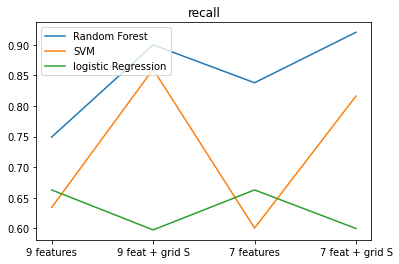

In [ ]:
#precison
plt.plot(resultado_recall.columns ,resultado_recall.loc['Random Forest'])
plt.plot(resultado_recall.columns ,resultado_recall.loc['SVM'])
plt.plot(resultado_recall.columns ,resultado_recall.loc['logistic Regression'])
plt.legend(['Random Forest', 'SVM', 'logistic Regression'], loc='upper left')
plt.title('recall')

Text(0.5, 1.0, 'f1-score')

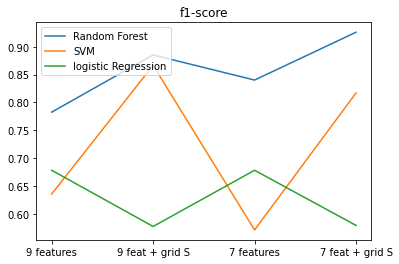

In [ ]:
#f1-score
plt.plot(resultado_f1score.columns ,resultado_f1score.loc['Random Forest'])
plt.plot(resultado_f1score.columns ,resultado_f1score.loc['SVM'])
plt.plot(resultado_f1score.columns ,resultado_f1score.loc['logistic Regression'])
plt.legend(['Random Forest', 'SVM', 'logistic Regression'], loc='upper left')
plt.title('f1-score')

In [ ]:
#Neural Network
resultado_dict_NN = {'9 features':[0.3694, 0.9375,0.3957], '9 feat + grid S': [0.3571, 0.9399, 0.3720], '7 features': [0.4064, 0.9404, 0.4213 ],  '7 feat + grid S': [0.4113, 0.9130, 0.4480]}
resultado_NN = pd.DataFrame(resultado_dict_NN, index=["Acurracy", "Preision", "Recall"])
resultado_NN.index.name = 'Neural Network - MLP'
resultado_NN

,9 features,9 feat + grid S,7 features,7 feat + grid S
Neural Network - MLP,,,,
Acurracy,0.3694,0.3571,0.4064,0.4113
Preision,0.9375,0.9399,0.9404,0.9130
Recall,0.3957,0.3720,0.4213,0.4480


Text(0.5, 1.0, 'Neural Netwrok - MLP')

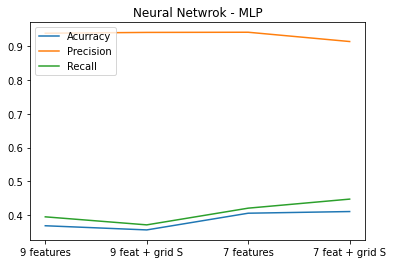

In [ ]:
#f1-score
plt.plot(resultado_NN.columns ,resultado_NN.loc['Acurracy'])
plt.plot(resultado_NN.columns ,resultado_NN.loc['Preision'])
plt.plot(resultado_NN.columns ,resultado_NN.loc['Recall'])
plt.legend(['Acurracy', 'Precision', 'Recall'], loc='upper left')
plt.title('Neural Netwrok - MLP')
#falar sobre a diferença entre as métricas